In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# %store -r adult_data_export
# %store -r ionosphere_export


In [15]:
class LogisticRegression:
    def __init__(self, num_iter, lr=0.01, use_gradient=False, eps=1e-2,print_graphs=True):        
        # initialize hyperparameters 
        self.lr = lr
        self.eps = eps
        self.num_iter = num_iter
        self.use_gradient = use_gradient
        self.w = []
        self.print_graphs = print_graphs
        
    def add_intercept(self, X):
        N,D = X.shape
        intercept = np.ones((N, 1), dtype = X.dtype)
        return np.concatenate((intercept, X), axis=1)
        
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def fit(self, X, y, validation_set=[], model_name=''):
        acc = []
        vacc = []
        X = self.add_intercept(X)
        N,D = X.shape
        self.w = np.zeros(D)
        
        g = np.inf 
        if(self.use_gradient):
            i = 0
            while np.linalg.norm(g) > self.eps:
                i += 1
                yh = self.sigmoid(np.dot(X, self.w))
                g = np.dot(X.T, (yh - y)) / N
#                 print(g)
#                 print(np.linalg.norm(g))
                self.w = self.w - self.lr*g
                if(i == 10000):
                    print("Terminating early, 10k iterations reached.")
                    break
                if(self.print_graphs):
                    if (i%10 == 0):
                            y_pred = self.predict(X[:,:-1])
                            acc.append(self.accuracy(y, y_pred))
                            vacc_pred = self.predict(validation_set[:,:-1])
                            vacc.append(self.accuracy(validation_set[:,-1],vacc_pred))
        else:
            for i in range(self.num_iter):
                yh = self.sigmoid(np.dot(X, self.w))
                g = np.dot(X.T, (yh - y)) / N
                self.w = self.w - self.lr*g
                
                if(self.print_graphs):
                    if (i%10 == 0):
                            y_pred = self.predict(X[:,:-1])
                            acc.append(self.accuracy(y, y_pred))
                            vacc_pred = self.predict(validation_set[:,:-1])
                            vacc.append(self.accuracy(validation_set[:,-1],vacc_pred))
                
        if(self.print_graphs): 
            # Add title and axis names
            plt.title(model_name + ': Training Accuracy Vs. Number of Iterations')
            plt.xlabel('Iteration Number')
            plt.ylabel('Training Accuracy')

            x_values = []
            for j, value in enumerate(acc):
                x_values.append(j*10)
            
            plt.plot(x_values,acc)
            plt.show()

            # Add title and axis names
            plt.title(model_name + ': Validation Accuracy Vs. Number of Iterations')
            plt.ylabel('Validation Accuracy')
            plt.xlabel('Iteration Number')

            plt.plot(x_values,vacc)
            plt.show()
            
#         print(self.w)

    def accuracy(self,y, yh):
        tp = np.sum(np.logical_and(yh==1,y==1))
        tn = np.sum(np.logical_and(yh==0,y==0))
    
        acc = (tp+tn)/y.size
        return acc
    
    def predict(self, X):     
        X = self.add_intercept(X)
#         N,D = X.shape
        yh = self.sigmoid(np.dot(X, self.w))
        predictions = (yh >= 0.5).astype(int)
        return predictions
        
        

    

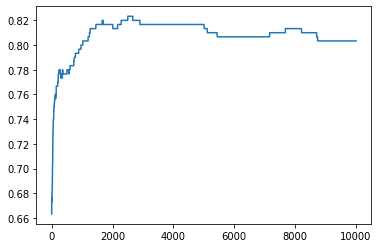

In [16]:
# np.random.shuffle(ionosphere_export)

# train_X = ionosphere_export[:300, :-1]
# train_y = ionosphere_export[:300, -1]

# test_X = ionosphere_export[300:, :-1]
# test_y = ionosphere_export[300:, -1]

# lr = LogisticRegression(100000)
# lr.fit(train_X, train_y)



# y_pred = lr.predict(test_X)
# lr1_acc = evaluate_acc(y_pred, test_y)
# lr.predict(np.matrix([[1,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697],[1,1,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697]]))

In [ ]:
# lr2 = linear_model.LogisticRegression()
# lr2.fit(train_X, train_y)

# print(lr2.coef_) # returns a matrix of weights (coefficients)'

# y_pred = lr2.predict(test_X)
# lr2_acc = evaluate_acc(y_pred, test_y)

# print("lr1: ", lr1_acc)
# print("lr2: ", lr2_acc)


matrix([[ True]])